In [1]:
import numpy as np
import pandas as pd

arr = np.random.randn(100,100)
pd.DataFrame(pd.Series(arr.ravel()).describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
0,10000.0,0.010613,0.985307,-3.629813,-0.638325,0.020811,0.657169,3.784645


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 

df=pd.read_csv( 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ',sep=';')
weights = np.transpose(df)[0]
heights = np.transpose(df)[1]

In [2]:
pca = PCA(n_components = 1)
pca.fit_transform(np.transpose(np.array([weights, heights])))

array([[ -1.67810019],
       [-10.84489266],
       [-11.94350782],
       [ -8.7718361 ],
       [-11.82202479],
       [ 15.34464386],
       [ 63.18389983],
       [-10.60863612],
       [ -7.52278618],
       [-11.08615106],
       [  0.99932816],
       [ -5.24993694]])

In [3]:
pca.get_covariance()

array([[ 90.8900216 , 180.1451353 ],
       [180.1451353 , 368.47694218]])

In [4]:
pca.explained_variance_ratio_

array([0.99505364])

In [5]:
s = pca.components_[0]
s

array([0.44140733, 0.89730684])

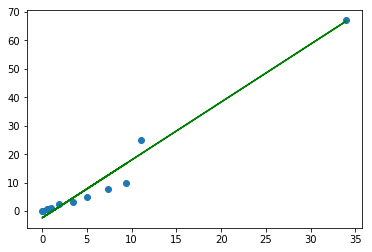

In [6]:
plt.plot(weights, heights, "o")
plt.plot(weights, np.mean(heights) + s[1] / s[0] * (weights - np.mean(weights)), "g")
plt.show()

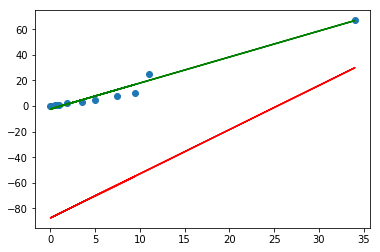

In [7]:
alpha = -87.43
beta = 3.45
 
fig = plt.figure()
plt.plot(weights, heights, "o")
plt.plot(weights, np.mean(heights) + s[1] / s[0] * (weights - np.mean(weights)), "g")
plt.plot(weights, alpha + beta * weights, "r")
plt.show()

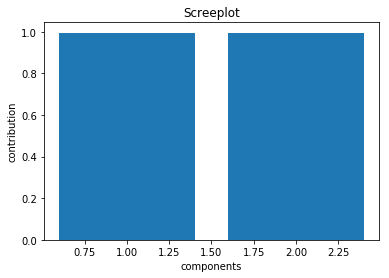

In [8]:
plt.bar([1, 2], pca.explained_variance_ratio_, align = "center")
plt.title("Screeplot")
plt.xlabel("components")
plt.ylabel("contribution")
plt.show()

NameError: name 'winds' is not defined

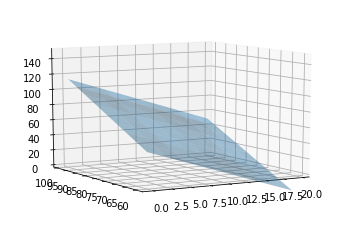

In [9]:
from mpl_toolkits.mplot3d import Axes3D
 
coeff = 40
beta_0 = -67.24
beta_wind = -3.29
beta_temp = 1.83
 
def show_with_angle(angle):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev = 10., azim = angle)
    ax.set_zlim(0, 150)
    x = np.arange(0, 20, 0.5)
    y = np.arange(60, 100, 1.0)
    X, Y = np.meshgrid(x, y)
    Z = beta_0 + beta_wind * X + beta_temp * Y
    surf = ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, alpha = 0.4)
    ax.plot([np.mean(winds), np.mean(winds) + coeff * u[0]], [np.mean(temps), np.mean(temps) + coeff * u[1]], [np.mean(ozones), np.mean(ozones) + coeff * u[2]], 'r')
    ax.plot([np.mean(winds), np.mean(winds) + coeff * v[0]], [np.mean(temps), np.mean(temps) + coeff * v[1]], [np.mean(ozones), np.mean(ozones) + coeff * v[2]], 'c')
    ax.scatter(winds, temps, ozones, c='green', marker='o', alpha=1)
    ax.set_xlabel('Wind')
    ax.set_ylabel('Temp')
    ax.set_zlabel('Ozone')
    plt.show()
 
for angle in range(-120, 120, 30):
    show_with_angle(angle)